<a href="https://colab.research.google.com/github/noureldinmo/CognoRise-infotech/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Handle missing values if necessary
df.dropna(inplace=True)

In [ ]:
# Split the data into features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']                # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Perform one-hot encoding for categorical features in both training and prediction data
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure columns in X_train_encoded and X_test_encoded match
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0  # Add missing columns with default value 0

# Ensure columns in X_test_encoded are in the same order as in X_train_encoded
X_test_encoded = X_test_encoded[X_train_encoded.columns]

Streaming output truncated to the last 5000 lines.
<ipython-input-10-729901a74dfe>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_encoded[col] = 0  # Add missing columns with default value 0
<ipython-input-10-729901a74dfe>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_encoded[col] = 0  # Add missing columns with default value 0
<ipython-input-10-729901a74dfe>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [ ]:
# Train the model with the preprocessed data
model.fit(X_train_encoded, y_train)

# Predict using the preprocessed test data
y_pred = model.predict(X_test_encoded)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1158283909946.6929


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: -0.13574355706167918


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(X_train_encoded, y_train)

RandomForestRegressor()

In [ ]:
# Predict on the test set
y_pred_rf_regressor = rf_regressor.predict(X_test_encoded)

In [ ]:
# Calculate Mean Squared Error
mse_rf_regressor = mean_squared_error(y_test, y_pred_rf_regressor)
print("Mean Squared Error (Random Forest Regressor):", mse_rf_regressor)

Mean Squared Error (Random Forest Regressor): 970310331773.0552


**Decision tree regression,**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train_encoded, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict on the test set
y_pred_dt_regressor = dt_regressor.predict(X_test_encoded)

In [ ]:
# Calculate Mean Squared Error
mse_dt_regressor = mean_squared_error(y_test, y_pred_dt_regressor)
print("Mean Squared Error (Decision Tree Regressor):", mse_dt_regressor)

Mean Squared Error (Decision Tree Regressor): 1000972945301.9215


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Train the model
gb_regressor.fit(X_train_encoded, y_train)

GradientBoostingRegressor()

In [ ]:
# Predict on the test set
y_pred_gb_regressor = gb_regressor.predict(X_test_encoded)

In [ ]:
# Calculate Mean Squared Error
mse_gb_regressor = mean_squared_error(y_test, y_pred_gb_regressor)
print("Mean Squared Error (Gradient Boosting Regressor):", mse_gb_regressor)

Mean Squared Error (Gradient Boosting Regressor): 968090695172.0537


**R-squared score for each model**

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score for each model
r2_linear = r2_score(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred_rf_regressor)
r2_dt = r2_score(y_test, y_pred_dt_regressor)
r2_gb = r2_score(y_test, y_pred_gb_regressor)

print("R-squared score (Linear Regression):", r2_linear)
print("R-squared score (Random Forest Regression):", r2_rf)
print("R-squared score (Decision Tree Regression):", r2_dt)
print("R-squared score (Gradient Boosting Regression):", r2_gb)


R-squared score (Linear Regression): -0.13574355706167918
R-squared score (Random Forest Regression): 0.048572031262744786
R-squared score (Decision Tree Regression): 0.0185061161110055
R-squared score (Gradient Boosting Regression): 0.05074847345188116


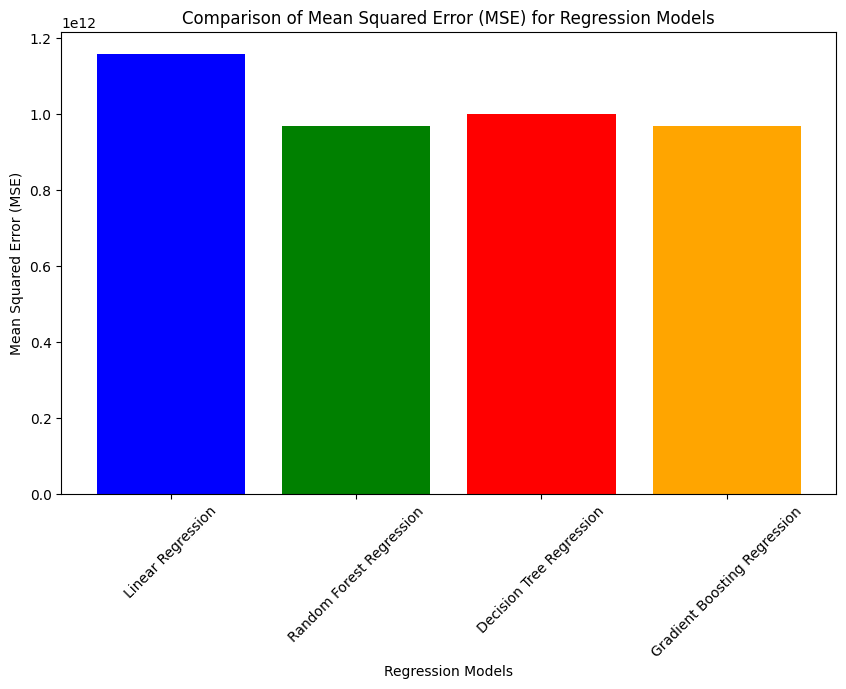

In [ ]:
import matplotlib.pyplot as plt

# List of models and their MSE values
models = ['Linear Regression', 'Random Forest Regression', 'Decision Tree Regression', 'Gradient Boosting Regression']
mse_values = [mse, mse_rf_regressor, mse_dt_regressor, mse_gb_regressor]

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Regression Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Select a sample from the test set for testing
sample_index = 0  # Change this index as needed
sample_features = X_test_encoded.iloc[sample_index]

# Print the selected features
print("Sample Features:")
print(sample_features)

# Predict using the trained regression models
pred_linear = model.predict([sample_features])[0]
pred_rf = rf_regressor.predict([sample_features])[0]
pred_dt = dt_regressor.predict([sample_features])[0]
pred_gb = gb_regressor.predict([sample_features])[0]

# Print the predicted house prices
print("\nPredicted House Prices:")
print("Linear Regression:", pred_linear)
print("Random Forest Regression:", pred_rf)
print("Decision Tree Regression:", pred_dt)
print("Gradient Boosting Regression:", pred_gb)

# Print the actual house price
actual_price = y_test.iloc[sample_index]
print("\nActual House Price:", actual_price)


Sample Features:
bedrooms               3.0
bathrooms              2.5
sqft_living           1460
sqft_lot              1613
floors                 2.0
                     ...  
statezip_WA 98198    False
statezip_WA 98199    False
statezip_WA 98288        0
statezip_WA 98354        0
country_USA           True
Name: 3683, Length: 3839, dtype: object

Predicted House Prices:
Linear Regression: 502506.33285068907
Random Forest Regression: 447993.96
Decision Tree Regression: 337000.0
Gradient Boosting Regression: 429992.0454192568

Actual House Price: 544000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
